In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "merged_crop_yield_dataset.csv" 
df = pd.read_csv(file_path)

print("Data loaded successfully.")
print("Shape:", df.shape)
df.head()


Data loaded successfully.
Shape: (28373, 15)


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,N,P,K,Temperature,Humidity
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,101,53,34,28.87,73.57
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,142,57,49,20.62,69.10
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,64,42,67,26.91,78.26
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,121,72,59,26.54,52.71
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,110,20,63,28.20,57.82


In [7]:
required_columns = [
    'Crop', 'Season', 'State', 'Area', 'Annual_Rainfall',
    'Fertilizer', 'Pesticide', 'N', 'P', 'K', 'Temperature', 'Humidity', 'Yield'
]

df = df[required_columns].copy()
# Drop missing or invalid values
df = df.dropna()
# Remove rows with zero or negative area/yield
df = df[(df['Area'] > 0) & (df['Yield'] > 0)]

print("Cleaned data shape:", df.shape)
df.head()


Cleaned data shape: (28241, 13)


,Crop,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,N,P,K,Temperature,Humidity,Yield
0,Arecanut,Whole Year,Assam,73814.0,2051.4,7024878.38,22882.34,101,53,34,28.87,73.57,0.796087
1,Arhar/Tur,Kharif,Assam,6637.0,2051.4,631643.29,2057.47,142,57,49,20.62,69.10,0.710435
2,Castor seed,Kharif,Assam,796.0,2051.4,75755.32,246.76,64,42,67,26.91,78.26,0.238333
3,Coconut,Whole Year,Assam,19656.0,2051.4,1870661.52,6093.36,121,72,59,26.54,52.71,5238.051739
4,Cotton(lint),Kharif,Assam,1739.0,2051.4,165500.63,539.09,110,20,63,28.20,57.82,0.420909


In [9]:
# Summary statistics
df.describe(include='all')

,Crop,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,N,P,K,Temperature,Humidity,Yield
count,28241,28241,28241,2.824100e+04,28241.000000,2.824100e+04,2.824100e+04,28241.000000,28241.000000,28241.000000,28241.000000,28241.000000,28241.000000
unique,55,6,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rice,Kharif,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2671,11012,2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.934157e+05,1420.253606,2.591666e+07,5.260152e+04,99.419213,49.385255,54.483269,27.515647,70.038138,56.652447
std,NaN,NaN,NaN,7.612990e+05,758.878440,9.623013e+07,2.225753e+05,28.839022,17.293282,20.220387,4.321341,11.478604,734.286896
min,NaN,NaN,NaN,5.000000e-01,301.300000,5.417000e+01,9.000000e-02,50.000000,20.000000,20.000000,20.000000,50.010000,0.003571
25%,NaN,NaN,NaN,1.564000e+03,956.900000,2.142435e+05,4.114000e+02,74.000000,34.000000,37.000000,23.790000,60.090000,0.610000
50%,NaN,NaN,NaN,1.170700e+04,1260.800000,1.586680e+06,3.075600e+03,99.000000,49.000000,55.000000,27.550000,70.090000,1.100000
75%,NaN,NaN,NaN,9.158400e+04,1610.300000,1.218231e+07,2.395995e+04,125.000000,64.000000,72.000000,31.270000,80.020000,2.416667


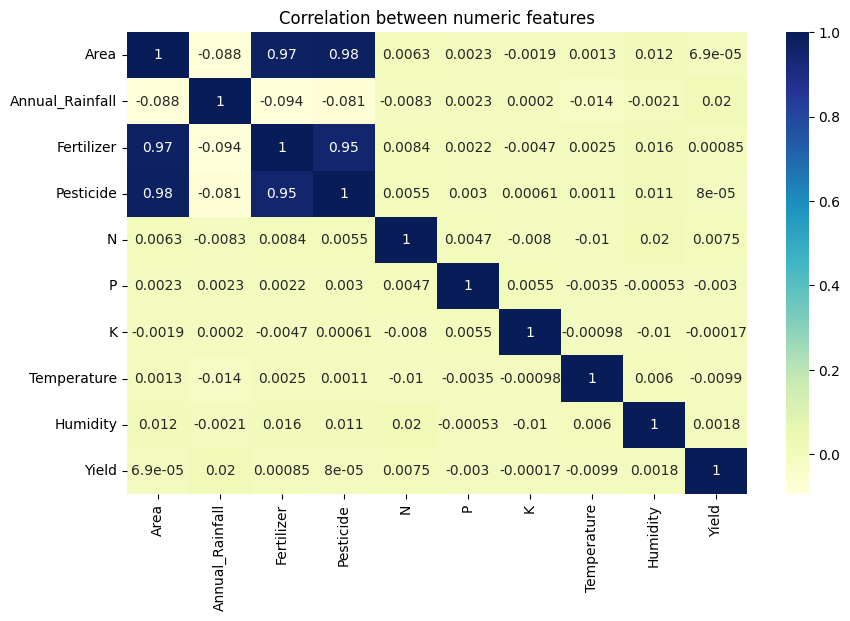

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation between numeric features")
plt.show()

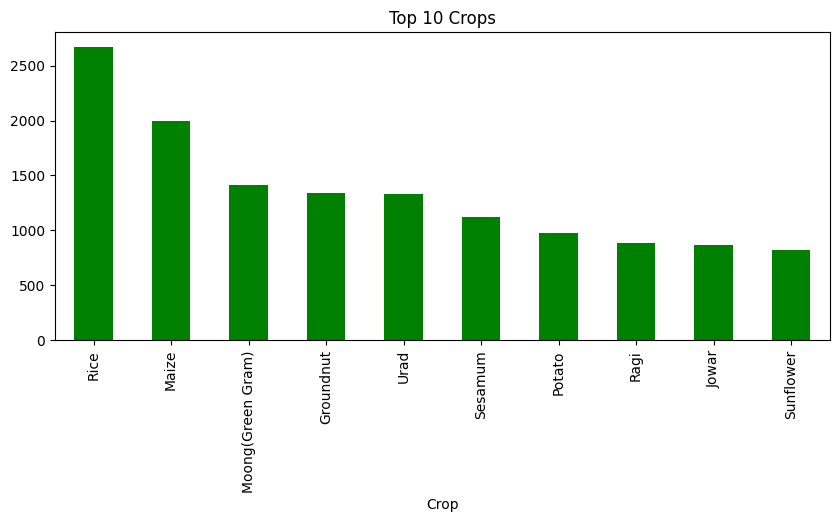

In [11]:
# Check crop distribution
plt.figure(figsize=(10,4))
df['Crop'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Crops")
plt.show()


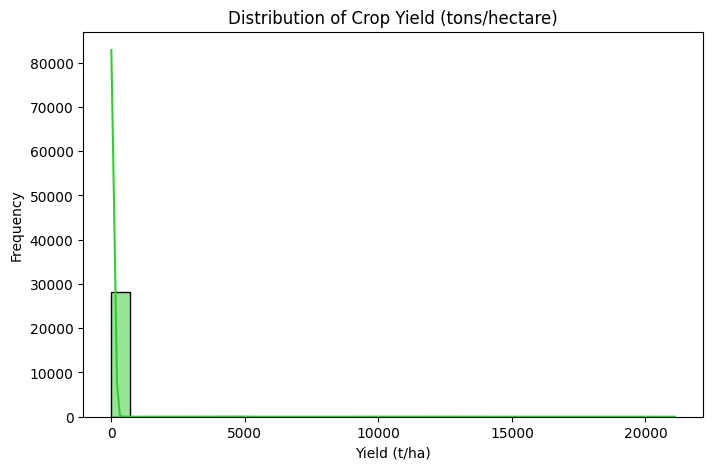

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Yield'], bins=30, kde=True, color='limegreen')
plt.title("Distribution of Crop Yield (tons/hectare)")
plt.xlabel("Yield (t/ha)")
plt.ylabel("Frequency")
plt.show()

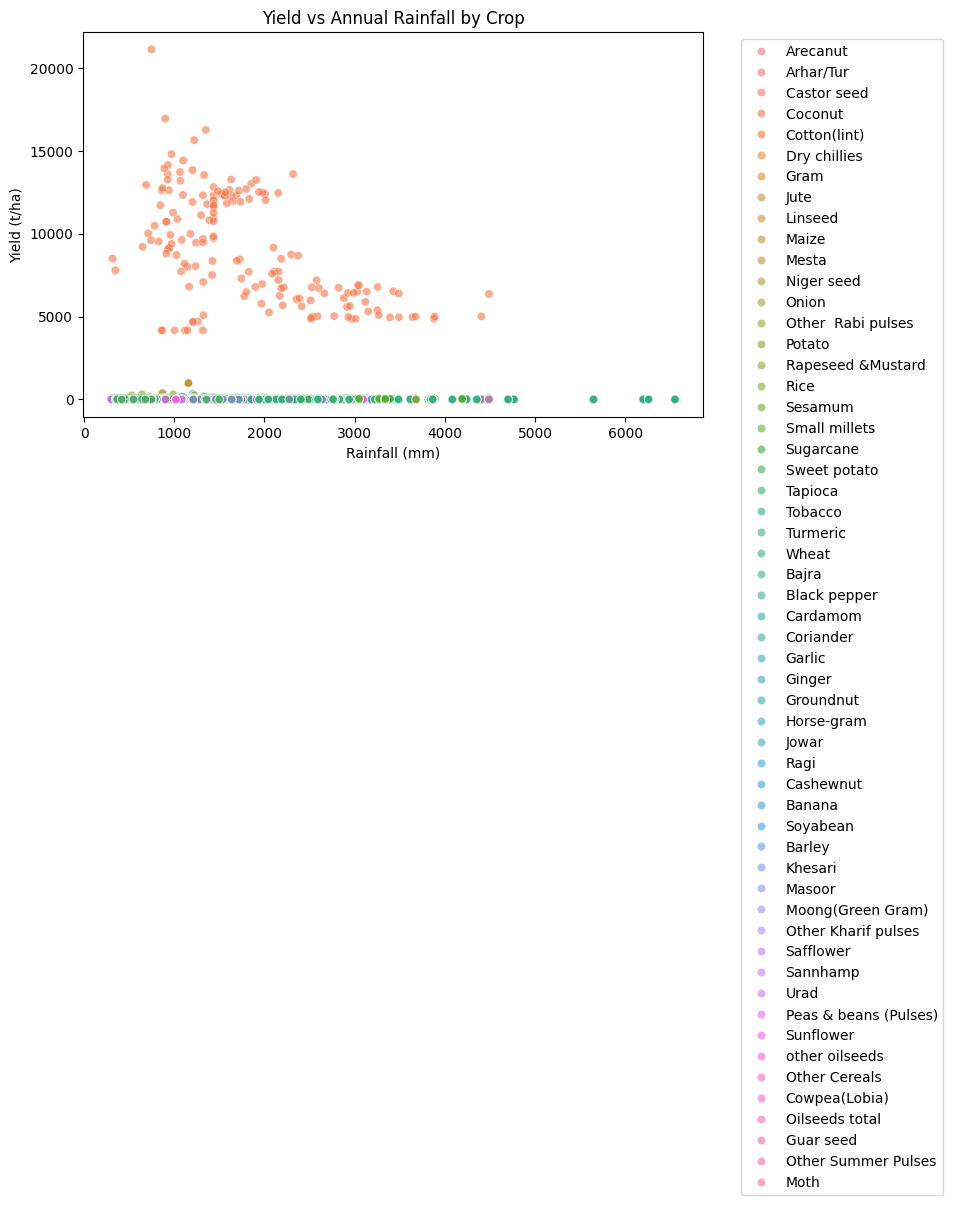

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual_Rainfall', y='Yield', hue='Crop', data=df, alpha=0.6)
plt.title("Yield vs Annual Rainfall by Crop")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (t/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
